---
title:  "Clustering Usint AutoEncoder"  
excerpt: "clusstering data and visualize"  

categories:  
  - Deep-Learning  
tags:  
  - Auto_Encoder  
  - tensor_flow 2.0  
  - Clustering
  - Keras
last_modified_at: 2020-06-14T18:06:00-05:00
---

## Reference  
* [Minsuk Heo Youtube and github](https://github.com/minsuk-heo/tf2/blob/master/jupyter_notebooks/04.AutoEncoder.ipynb)  
* [cypisioin blog](https://cypision.github.io/deep-learning/Fraud_Detection_Using_Keras/)

#### Big News 기존에 사용하던 keras 대신, 향후에는 tnsorflow2.0 으로 변경하였습니다.  이는 별도로 있는 keras가 tensorflow 안으로 통합되었기 때문입니다.  
(https://www.pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/)  
> 기존의 keras 코드를 모두 바꿀필요는 없습니다. tf.keras 로만 변경하면 됩니다.

## 1. mnist 로 auto_encoder clustering 해보기

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

In [3]:
## 하기 그림 image 는 모두 minsuk-heo 소스활용함
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", width=500, height=250)

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
print("x_train.shape",x_train.shape)
print("x_test.shape",x_test.shape)
print("y_train.shape",y_train.shape)
print("y_test.shape",y_test.shape)

x_train.shape (60000, 28, 28)
x_test.shape (10000, 28, 28)
y_train.shape (60000,)
y_test.shape (10000,)


In [6]:
## 하기 그림 image 는 모두 minsuk-heo 소스활용함
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder2.png", width=500, height=250)

In [7]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- Mnist 는 총 10개의 흑백 이미지 라벨링을 가지고 있음  
- 하기는 성능상 적은 data만으로 실습하기 위해 300개로 줄이고, 이를 scling 한다.

In [8]:
# we will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

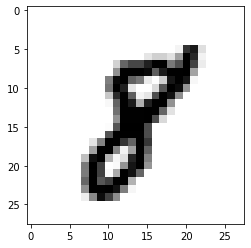

In [14]:
INDEX = 17
plt.imshow(x_train[INDEX].reshape(28,28), cmap='gray_r')

- 혹 순서에 따른 배열이 되었을까봐 섞어주고, batch_size object 화 해준다.

In [10]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(len(x_train)).batch(32) 
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

- Modeling 시 어떤 방식으로 해도 무방한다. 하기는 Model() 클래스에 넣는 방식

In [11]:
# MNIST input 28 rows * 28 columns = 784 pixels
input_img = Input(shape=(784,))
# encoder
encoder1 = Dense(128,activation='sigmoid')(input_img)
encoder2 = Dense(3, activation='sigmoid')(encoder1) ## 3차원으로 표현해야하기 때문
# decoder
decoder1 = Dense(128, activation='sigmoid')(encoder2)
decoder2 = Dense(784, activation='sigmoid')(decoder1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs=input_img, outputs=decoder2)

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_3 (Dense)              (None, 784)               101136    
Total params: 202,515
Trainable params: 202,515
Non-trainable params: 0
_________________________________________________________________


- Modeling 시 어떤 방식으로 해도 무방한다. 하기는 Sequntial() 로 하는 방식

In [15]:
mymodel = tf.keras.models.Sequential()
mymodel.add(Dense(128,input_shape=(784,),activation='sigmoid',name='enc01'))
mymodel.add(Dense(3,activation='sigmoid',name='enc02'))
mymodel.add(Dense(128,activation='sigmoid',name='dec01'))
mymodel.add(Dense(784,activation='sigmoid',name='dec02')) ## input_shape dim 이 같게 해야 하는 점이 중요하다.

In [16]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
enc01 (Dense)                (None, 128)               100480    
_________________________________________________________________
enc02 (Dense)                (None, 3)                 387       
_________________________________________________________________
dec01 (Dense)                (None, 128)               512       
_________________________________________________________________
dec02 (Dense)                (None, 784)               101136    
Total params: 202,515
Trainable params: 202,515
Non-trainable params: 0
_________________________________________________________________


In [47]:
opti = tf.keras.optimizers.Adam(learning_rate=0.01,name='Adam')

In [50]:
# autoencoder.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])
autoencoder.compile(optimizer=opti,loss='mse',metrics=['mse']) ## learning rate 를 좀더 0.01 로 크게했을때가 좀 더 낫다.
# autoencoder.compile(optimizer='rmsprop',loss='binary_crossentropy')
# autoencoder.compile(optimizer='rmsprop',loss='BinaryCrossentropy') ## 'BinaryCrossentropy' object has no attribute '__name__' 에러난다.

In [49]:
autoencoder.fit(x_train, x_train, ## 둘다 x_train 을 넣었다는 점이 point!!
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 300 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0369 - mse: 0.0369 - val_loss: 0.0359 - val_mse: 0.0359
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 3/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 4/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0358 - mse: 0.0358 - val_loss: 0.0348 - val_mse: 0.0348
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0356 - mse: 0.0356 - val_loss: 0.0349 - val_mse: 0.0349
Epoch 6/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0354 - mse: 0.0354 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 7/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0352 - mse: 0.0352 - val_loss: 0.03

In [232]:
# create encoder model
encoder = Model(inputs=input_img, outputs=encoder2)

In [52]:
# get latent vector for visualization
latent_vector = encoder.predict(x_test)

In [53]:
latent_vector.shape
## encoder의 결과만을 보여주기 때문에 encoder2 를 거쳐서 나온 output = (rows,dimension=3) 이다.

(300, 3)

- MNIST 3D Visualization

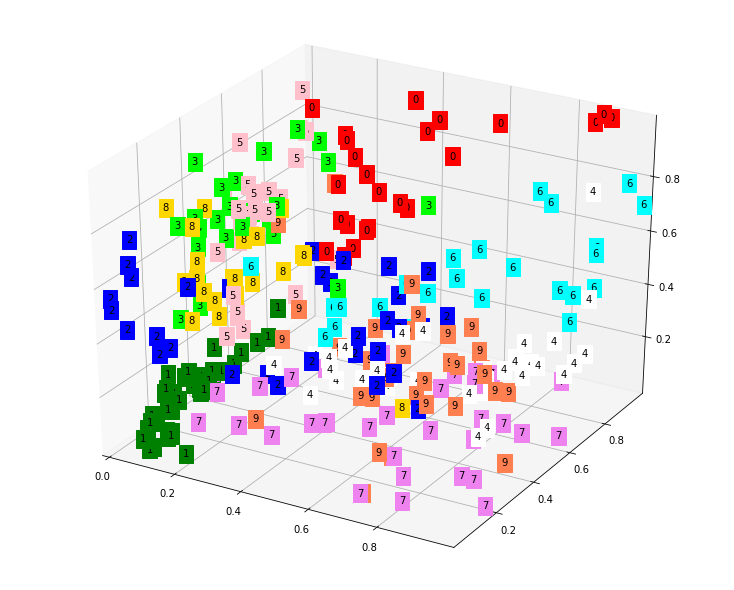

In [54]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

- decoder 모델로 얼마나 잘 복원했는지 확인하기

In [55]:
# create decoder model
encoded_input = Input(shape=(3,))
decoder_layer1 = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer1(encoded_input)))

In [56]:
# get decoder output to visualize reconstructed image
reconstructed_imgs = decoder.predict(latent_vector)

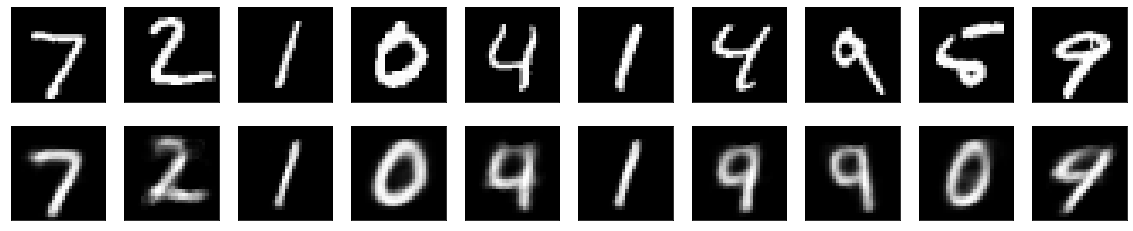

In [57]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

상당히 잘 복원이 되었고, 2개 정도만, 틀린것 같다.

## 2. Fraud Detection 으로 auto_encoder clustering 해보기

In [6]:
import pandas as pd
import numpy as np
import pickle
from scipy import stats

In [7]:
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

In [8]:
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [9]:
df = pd.read_csv("D:/★2020_ML_DL_Project/Alchemy/dataset/creditcard.csv")

In [10]:
df.shape

(284807, 31)

In [11]:
print(df.Class.value_counts())
print((df.Class.value_counts()/df.Class.count())*100)

0    284315
1       492
Name: Class, dtype: int64
0    99.827251
1     0.172749
Name: Class, dtype: float64


In [12]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
pd.concat([frauds.Amount.describe(),normal.Amount.describe()],axis=1,names=['fraud','normal'])

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


시각화하니, Fraud 건들은 주로 1000건 이하, 특히 400건 이하에서 이루어지고 있음을 알 수 있다.

Amount 가 1500 이상이 차지하는 비율을 확인해보면, 1350  row 임. 이중 Fraud 갯수는 3 개 이므로, 이상치로 판단 제거한다. 

In [13]:
print(df.loc[df.Amount >= 1500,:].shape)
print(df.loc[df.Amount >= 1500,'Class'].value_counts())
print(df.loc[df.Amount >= 1500,'Class'].value_counts().iloc[1]/(df.loc[df.Amount >= 1500,:].shape[0])*100)

(1350, 31)
0    1347
1       3
Name: Class, dtype: int64
0.2222222222222222


In [14]:
df01 = df.loc[df.Amount < 1500,:]

In [15]:
from sklearn.preprocessing import StandardScaler
data = df01.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [16]:
data.reset_index(drop=True,inplace=True)
print(data.shape)

(283457, 30)


- 불균형데이터지만, Auto Encoder로 학습시킨후, 결과가 어떻게 되는지 확인해본다.  
- 단 학습목적을 위해, Class = 0 인 데이터를 50000 건 가량으로 줄인다.

In [17]:
data.index

RangeIndex(start=0, stop=283457, step=1)

In [18]:
z_lst = data.loc[data.Class==0].index.to_list()
z_idx = np.random.choice(z_lst,50000,replace=False)
f_idx = data.loc[data.Class==1].index.to_list()
new_data = data.loc[data.index.isin(z_idx)|data.index.isin(f_idx)].copy()

In [19]:
print(len(z_idx),len(f_idx))

50000 489


In [20]:
print(new_data.shape)
print(new_data.Class.sum())

(50489, 30)
489


In [21]:
new_data.reset_index(drop=True,inplace=True)

In [22]:
y_data = new_data['Class'].copy()
x_data = new_data.drop(columns='Class',inplace=False)

In [23]:
print(x_data.shape,y_data.shape)

(50489, 29) (50489,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2, random_state=RANDOM_SEED)

In [25]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
457,-0.767490,0.182111,1.736865,0.251423,-1.046391,-0.217258,-0.528523,0.625258,0.393029,-0.912325,...,0.040748,0.076855,0.276781,0.320299,0.691233,-1.240529,0.870518,0.060173,0.091666,-0.252572
37677,-5.392637,2.470677,-1.191437,-1.410835,-1.349569,-0.278947,-0.480392,0.628039,2.576516,2.777247,...,-0.548796,-0.388231,-0.463723,0.492229,-0.459395,0.118890,-0.458600,-2.048161,-0.408870,-0.280091
21244,1.217242,0.609676,-0.477940,1.165912,0.233053,-0.750062,0.149329,-0.033144,-0.210281,-0.489372,...,-0.126175,-0.046558,-0.133732,-0.167255,-0.151469,0.678483,-0.321890,0.025911,0.042323,-0.493150
16098,-1.023833,-0.196981,3.113130,0.904437,-1.370377,1.483812,-0.872004,0.659401,-0.302880,0.554561,...,-0.281672,-0.387408,-0.087644,-0.064008,0.220801,0.166286,-0.085853,0.335104,0.149973,-0.174375
588,1.154362,0.462567,0.396658,2.112815,0.420039,0.750859,-0.093514,0.259020,-0.892424,0.805030,...,-0.159413,-0.228758,-0.757111,0.056977,-0.901578,0.249217,-0.199526,0.002128,0.006209,-0.460557


In [26]:
## 0번째 행의 값을 보면 알수 있듯이 PCA로 일단, 어느정도 scaling 이 되어있다고 보고, 원저자는 따로 scale 변환을 안한것 같다.
print(X_train.shape)
X_train.iloc[0]

(40391, 29)


V1       -0.767490
V2        0.182111
V3        1.736865
V4        0.251423
V5       -1.046391
V6       -0.217258
V7       -0.528523
V8        0.625258
V9        0.393029
V10      -0.912325
V11      -0.354927
V12       0.885538
V13       0.279830
V14      -0.257130
V15      -0.115824
V16      -0.826445
V17       0.981679
V18      -0.978372
V19       0.653111
V20       0.040748
V21       0.076855
V22       0.276781
V23       0.320299
V24       0.691233
V25      -1.240529
V26       0.870518
V27       0.060173
V28       0.091666
Amount   -0.252572
Name: 457, dtype: float64

---
#### 함수형 API 로 네트워크 층 만들기  ================__Start__================

Keras 모델 만들기 - Autoencoder 모델은 여기선, fully connected layers 로 64-32-3-32-29 를 이용한다.

In [27]:
input_dim = X_train.shape[1]
## input_layer
input_layer = Input(shape=(input_dim, ))
## Dense_layer first Encoder - 64
f_encoder_01 = Dense(64, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
## Dense_layer Second Encoder - 32
f_encoder_02 = Dense(32, activation="sigmoid")(f_encoder_01)
## Dense_layer Third Encoder - 3 make latent vector
f_encoder_03 = Dense(3, activation="sigmoid")(f_encoder_02)

## Dense_layer First Decoder - 
f_decoder_01 = Dense(32, activation='sigmoid')(f_encoder_03)
## Dense_layer Second Decoder - 14
f_decoder_02 = Dense(input_dim, activation='sigmoid')(f_decoder_01)
f_autoencoder = Model(inputs=input_layer, outputs=f_decoder_02)

※ activity_regularizer : keras dense layer의 옵션  
[activity_regularizer](https://keras.io/regularizers/)

In [28]:
f_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                1920      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 29)                957       
Total params: 5,184
Trainable params: 5,184
Non-trainable params: 0
___________________________________________________________

#### 함수형 API 로 네트워크 층 만들기  ================__End__================  
---

In [29]:
nb_epoch = 50
batch_size = 32

In [30]:
f_opti = tf.keras.optimizers.RMSprop(learning_rate=0.015,name='rmsprop')

In [31]:
# f_autoencoder.compile(optimizer='adam',loss='mse',metrics=['mse'])
f_autoencoder.compile(optimizer=f_opti,loss='mse',metrics=['mse'])
# f_autoencoder.compile(optimizer='rmsprop',loss='binary_crossentropy')

Train 상황을 지켜보기 위해, 하기 모듈을 불러와서, 사용한다.  
from keras.callbacks import ModelCheckpoint, TensorBoard

[keras callback 함수 설명](https://keras.io/ko/callbacks/)

In [32]:
## 각 iter 마다, 손실함수 값을 기록함.
checkpointer = ModelCheckpoint(filepath="D:/★2020_ML_DL_Project/Alchemy/DL_Area/fraud_detection_clustering.h5",
                               verbose=0,
                               save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
## 서플로우가 제공하는 시각화 도구입니다.
# ## 이 콜백은 TensorBoard에 로그를 기록하여 학습과 테스트 측정 항목에 대한 동적 그래프나 모델 내 다양한 레이어에 대한 활성화 히스토그램을 시각화 할 수 있도록 합니다.
# tensorboard = TensorBoard(log_dir='./logs',
#                           histogram_freq=0,
#                           write_graph=True,
#                           write_images=True)

In [33]:
history = f_autoencoder.fit(X_train, X_train,epochs=nb_epoch,batch_size=batch_size,
                          shuffle=True,validation_data=(X_test, X_test),verbose=1,
                          callbacks=[checkpointer,early_stop]).history

Train on 40391 samples, validate on 10098 samples
Epoch 1/50
40391/40391 [==============================] - 5s 116us/sample - loss: 1.1829 - mse: 1.1814 - val_loss: 1.1673 - val_mse: 1.1659
Epoch 2/50
40391/40391 [==============================] - 3s 84us/sample - loss: 1.1359 - mse: 1.1345 - val_loss: 1.1466 - val_mse: 1.1453
Epoch 3/50
40391/40391 [==============================] - 3s 84us/sample - loss: 1.1167 - mse: 1.1154 - val_loss: 1.1280 - val_mse: 1.1268
Epoch 4/50
40391/40391 [==============================] - 3s 85us/sample - loss: 1.1031 - mse: 1.1019 - val_loss: 1.1214 - val_mse: 1.1202
Epoch 5/50
40391/40391 [==============================] - 3s 83us/sample - loss: 1.0979 - mse: 1.0968 - val_loss: 1.1189 - val_mse: 1.1178
Epoch 6/50
40391/40391 [==============================] - 3s 82us/sample - loss: 1.0912 - mse: 1.0901 - val_loss: 1.1081 - val_mse: 1.1070
Epoch 7/50
40391/40391 [==============================] - 3s 83us/sample - loss: 1.0872 - mse: 1.0861 - val_loss: 1

In [34]:
f_autoencoder_result = load_model('D:/★2020_ML_DL_Project/Alchemy/DL_Area/fraud_detection_clustering.h5')

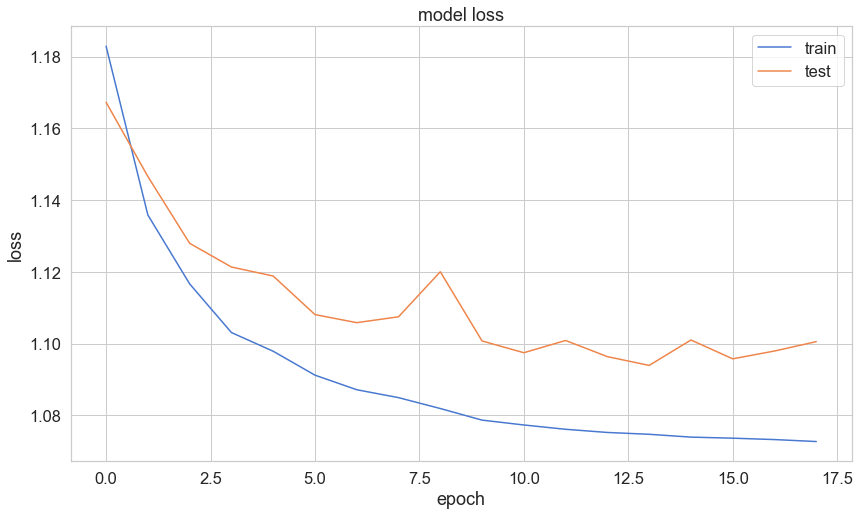

In [35]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

일단 5 epoch 에서 Early Stop 되었다.

In [36]:
# create encoder model
fraud_encoder = Model(inputs=input_layer, outputs=f_encoder_03)

In [37]:
# get latent vector for visualization
fraud_latent_vector = fraud_encoder.predict(X_test)

In [38]:
fraud_latent_vector.shape
## encoder의 결과만을 보여주기 때문에 encoder2 를 거쳐서 나온 output = (rows,dimension=3) 이다.

(10098, 3)

In [39]:
print(y_test.iloc[0:10])
print(y_test.shape)
print(y_test.sum())

48898    0
8230     0
50027    0
21374    0
27226    0
8409     0
26433    0
1030     0
24635    0
31102    0
Name: Class, dtype: int64
(10098,)
93


- Fraud Detection 3D Visualization

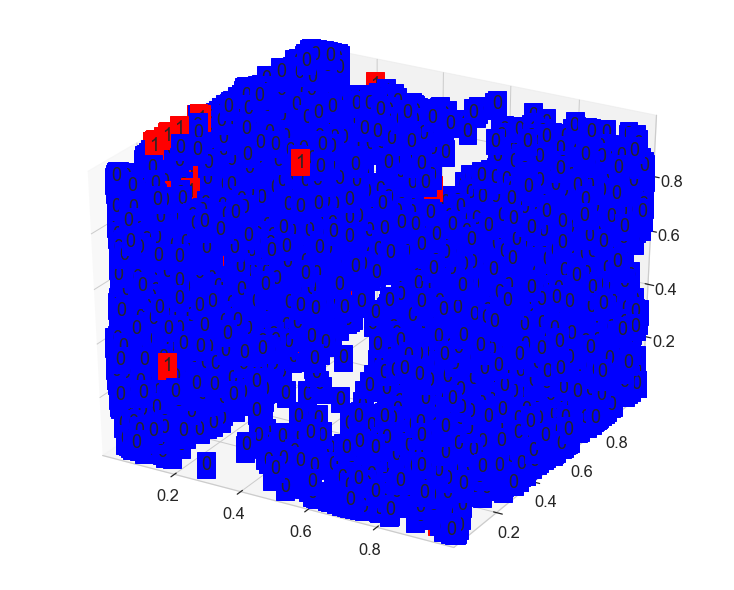

In [40]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = fraud_latent_vector[:, 0]
ys = fraud_latent_vector[:, 1]
zs = fraud_latent_vector[:, 2]

color=['blue','red']

for x, y, z, label in zip(xs, ys, zs, y_test.values):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

* latent vector 를 2D 하여 적용해보기

Keras 모델 만들기 - Autoencoder 모델은 여기선, fully connected layers 로 64-32-2-32-29 를 이용한다.

In [41]:
input_dim = X_train.shape[1]
## input_layer
input_layer = Input(shape=(input_dim, ))
## Dense_layer first Encoder - 64
f_encoder_01 = Dense(64, activation="sigmoid", activity_regularizer=regularizers.l1(10e-5))(input_layer)
## Dense_layer Second Encoder - 32
f_encoder_02 = Dense(32, activation="sigmoid")(f_encoder_01)
## Dense_layer Third Encoder - 3 make latent vector
f_encoder_03 = Dense(2, activation="sigmoid")(f_encoder_02)

## Dense_layer First Decoder - 
f_decoder_01 = Dense(32, activation='sigmoid')(f_encoder_03)
## Dense_layer Second Decoder - 14
f_decoder_02 = Dense(input_dim, activation='sigmoid')(f_decoder_01)
f_autoencoder = Model(inputs=input_layer, outputs=f_decoder_02)

※ activity_regularizer : keras dense layer의 옵션  
[activity_regularizer](https://keras.io/regularizers/)

In [42]:
f_autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1920      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_9 (Dense)              (None, 29)                957       
Total params: 5,119
Trainable params: 5,119
Non-trainable params: 0
_________________________________________________________

#### 함수형 API 로 네트워크 층 만들기  ================__End__================  
---

In [43]:
nb_epoch = 50
batch_size = 32

In [44]:
f_opti = tf.keras.optimizers.RMSprop(learning_rate=0.015,name='rmsprop')

In [45]:
# f_autoencoder.compile(optimizer='adam',loss='mse',metrics=['mse'])
f_autoencoder.compile(optimizer=f_opti,loss='mse',metrics=['mse'])
# f_autoencoder.compile(optimizer='rmsprop',loss='binary_crossentropy')

Train 상황을 지켜보기 위해, 하기 모듈을 불러와서, 사용한다.  
from keras.callbacks import ModelCheckpoint, TensorBoard

[keras callback 함수 설명](https://keras.io/ko/callbacks/)

In [46]:
## 각 iter 마다, 손실함수 값을 기록함.
checkpointer = ModelCheckpoint(filepath="D:/★2020_ML_DL_Project/Alchemy/DL_Area/fraud_detection_clustering.h5",
                               verbose=0,
                               save_best_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
## 서플로우가 제공하는 시각화 도구입니다.
# ## 이 콜백은 TensorBoard에 로그를 기록하여 학습과 테스트 측정 항목에 대한 동적 그래프나 모델 내 다양한 레이어에 대한 활성화 히스토그램을 시각화 할 수 있도록 합니다.
# tensorboard = TensorBoard(log_dir='./logs',
#                           histogram_freq=0,
#                           write_graph=True,
#                           write_images=True)

In [47]:
history = f_autoencoder.fit(X_train, X_train,epochs=nb_epoch,batch_size=batch_size,
                          shuffle=True,validation_data=(X_test, X_test),verbose=1,
                          callbacks=[checkpointer,early_stop]).history

Train on 40391 samples, validate on 10098 samples
Epoch 1/50
40391/40391 [==============================] - 4s 100us/sample - loss: 1.1889 - mse: 1.1876 - val_loss: 1.1780 - val_mse: 1.1766
Epoch 2/50
40391/40391 [==============================] - 4s 90us/sample - loss: 1.1407 - mse: 1.1394 - val_loss: 1.1472 - val_mse: 1.1459
Epoch 3/50
40391/40391 [==============================] - 4s 88us/sample - loss: 1.1215 - mse: 1.1203 - val_loss: 1.1393 - val_mse: 1.1381
Epoch 4/50
40391/40391 [==============================] - 4s 88us/sample - loss: 1.1160 - mse: 1.1148 - val_loss: 1.1329 - val_mse: 1.1318
Epoch 5/50
40391/40391 [==============================] - 4s 87us/sample - loss: 1.1057 - mse: 1.1046 - val_loss: 1.1231 - val_mse: 1.1220
Epoch 6/50
40391/40391 [==============================] - 4s 87us/sample - loss: 1.1015 - mse: 1.1005 - val_loss: 1.1297 - val_mse: 1.1286
Epoch 7/50
40391/40391 [==============================] - 4s 89us/sample - loss: 1.0996 - mse: 1.0985 - val_loss: 1

일단 14 epoch 에서 Early Stop 되었다.

In [48]:
# create encoder model
fraud_encoder = Model(inputs=input_layer, outputs=f_encoder_03)

In [49]:
# get latent vector for visualization
fraud_latent_vector = fraud_encoder.predict(X_test)

In [50]:
fraud_latent_vector.shape
## encoder의 결과만을 보여주기 때문에 encoder2 를 거쳐서 나온 output = (rows,dimension=3) 이다.

(10098, 2)

- Fraud Detection 2D Visualization

In [83]:
xs = fraud_latent_vector[:, 0]
ys = fraud_latent_vector[:, 1]

In [84]:
a = np.array([[0,1,2]])
b = np.array([[3,4,5]])
print(a.ndim)
np.r_['0',a,b]

2


array([[0, 1, 2],
       [3, 4, 5]])

In [85]:
lst = []
for x, y, label in zip(xs, ys,y_test.values):
    lst.append([x, y, label])
visual_df = np.array(lst)

In [86]:
visual_df = pd.DataFrame(data=visual_df,columns=['factor_0','factor_1','Label'])

In [87]:
visual_df.head()

,factor_0,factor_1,Label
0,0.377792,0.145275,0.0
1,0.644523,0.778089,0.0
2,0.822615,0.294378,0.0
3,0.999903,0.991384,0.0
4,0.005118,0.027080,0.0


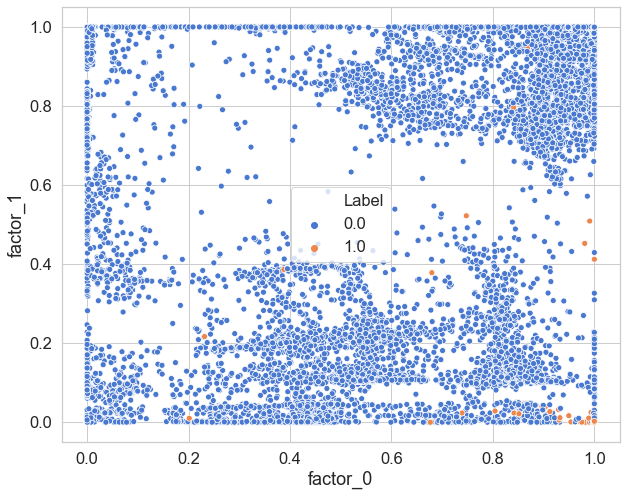

In [88]:
sns.scatterplot(x='factor_0',y='factor_1',hue='Label',data=visual_df,palette='muted')

결론적으로 보면, 2D,3D 화면 에서뭔가 구분이 되는 형태로, 보이는게 있긴 하다. 그러나, 워낙 많은 차원을 줄이다보니...시각화 상태에서는 정확히 포착하기 어렵다.  
일단, 어느정도 의미를 두는 선에서, 마무리한다.